## Comparison of various clustering algorithms

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


In [3]:
X

array([[ 0.81680544,  0.5216447 ],
       [ 1.61859642, -0.37982927],
       [-0.02126953,  0.27372826],
       [-1.02181041, -0.07543984],
       [ 1.76654633, -0.17069874],
       [ 1.8820287 , -0.04238449],
       [ 0.97481551,  0.20999374],
       [ 0.88798782, -0.48936735],
       [ 0.89865156,  0.36637762],
       [ 1.11638974, -0.53460385],
       [-0.36380036,  0.82790185],
       [ 0.24702417, -0.23856676],
       [ 1.81658658, -0.13088387],
       [ 1.2163905 , -0.40685761],
       [-0.8236696 ,  0.64235178],
       [ 0.98065583,  0.20850838],
       [ 0.54097175,  0.88616823],
       [ 0.348031  , -0.30101351],
       [ 0.35181497,  0.88827765],
       [-0.77708642,  0.82253872],
       [ 1.92590813,  0.01214146],
       [ 0.86096723, -0.47653216],
       [ 0.19990695,  0.99672359],
       [ 1.2895301 , -0.37071087],
       [-0.27847636,  1.02538452],
       [ 0.24187916, -0.07627812],
       [ 1.84988768, -0.09773674],
       [ 1.88406869,  0.0449402 ],
       [ 0.165822  ,

In [4]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

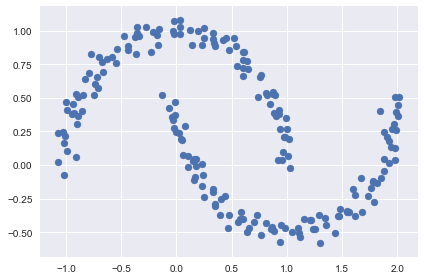

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

##  Let's try KMeans algorithm

In [6]:
from sklearn.cluster import KMeans

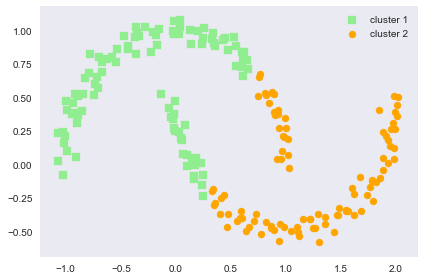

In [7]:
km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y, y_km))

0.755


#### Using ‘k-means++’ selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

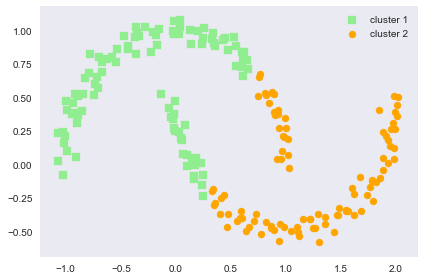

In [9]:
km1 = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km1 = km1.fit_predict(X)

plt.scatter(X[y_km1 == 0, 0],
            X[y_km1 == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km1 == 1, 0],
            X[y_km1 == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
print (accuracy_score(y, y_km1))

0.755


### Choosing the best value for K - Elbow method

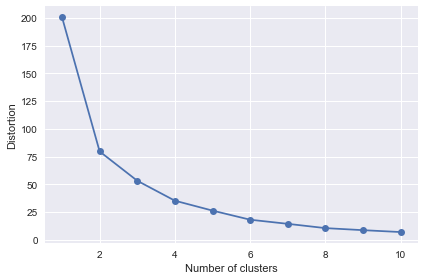

In [11]:
# SSE - sum of squared errors in the cluster. Also called as distortions
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Let's try Hierarchical Clustering 

In [12]:
from sklearn.cluster import AgglomerativeClustering

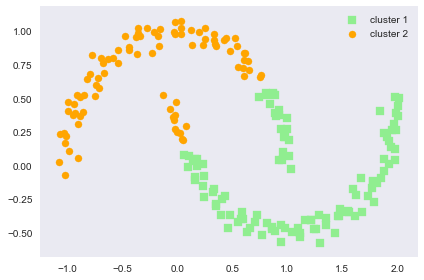

In [13]:
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')

y_ac = ac.fit_predict(X)

plt.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [14]:
print (accuracy_score(y, 1-y_ac))

0.83


##  DBSCAN 

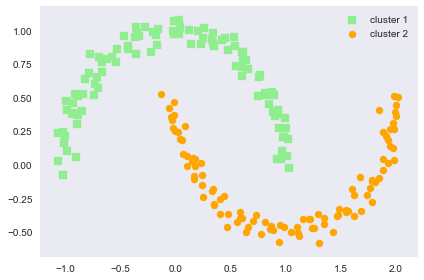

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
print (accuracy_score(y, y_db))

1.0
